# Run Predictions

In [2]:
# Standard Imports
import numpy as np

# Importing all relevant packages for modeling in keras
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model

# Import packages for showing the performance metrics
from sklearn.metrics import confusion_matrix

# Impor
import sys
sys.path.insrc import eval_plots

from glob import glob
import cv2
import os
from PIL import Image

# Setting the random seed for reproducability
np.random.seed(123)

In [3]:
# obtain paths for all models in models folder
models = glob('/Users/ajche/Documents/Flatiron/phase_5/cnn_classification_pathology/models/*.h5')

# define list of model names for saving evaluation plots 
model_names = [os.path.basename(path).replace('.h5','') for path in models]

In [8]:
# set up batch generator for validation set define the path to the test set
test_data_path = '../../data/split/test'
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
      test_data_pat', 
        target_size=(100, 100), 
        batch_size = 32,shufflelse,class_mode='binary')=Fa

# Define list of test labels from test set
y_test = test_generator.lasse)

Found 16229 images belonging to 2 classes.


In [9]:
# Initialize a dictionary with model names as keys and sub dictionary with probability, predictions
model_eval_dict = {}

# Run predictions with each model
for model_path in models:
    model = load_model(model_path)
    probs = model.predict(test_generator)
    model_eval_dict[os.path.basename(model_path).replace('.h5','')] = probs


In [10]:
for k,v in model_eval_dict.items():
    probs = v
    probs_list = [prob[0] for prob in probs]
    model_eval_dict[k] = probs_list

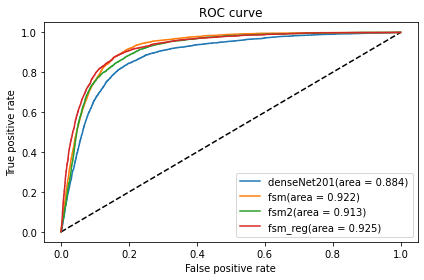

In [15]:
# Plot the ROC-curves for all of the models
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt


fig = plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
for k,v in model_eval_dict.items():
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, v)

    
    if k == 'fsm':
        auc_keras = auc(1 - fpr_keras, 1 - tpr_keras)
        plt.plot(1 - fpr_keras,1 - tpr_keras, label=k + '(area = {:.3f})'.format(auc_keras))
    else:
        auc_keras = auc(fpr_keras, tpr_keras)
        plt.plot(fpr_keras, tpr_keras, label=k + '(area = {:.3f})'.format(auc_keras))
    # plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
fig.tight_layout()
fig.savefig('denseNet201_ROC.png')
plt.show()
# # Zoom in view of the upper left corner.
# plt.figure(2)
# plt.xlim(0, 0.2)
# plt.ylim(0.8, 1)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve (zoomed in at top left)')
# plt.legend(loc='best')
# plt.show()                                            


In [16]:
models

['/Users/ajche/Documents/Flatiron/phase_5/cnn_classification_pathology/models\\denseNet201.h5',
 '/Users/ajche/Documents/Flatiron/phase_5/cnn_classification_pathology/models\\fsm.h5',
 '/Users/ajche/Documents/Flatiron/phase_5/cnn_classification_pathology/models\\fsm2.h5',
 '/Users/ajche/Documents/Flatiron/phase_5/cnn_classification_pathology/models\\fsm_reg.h5']

In [24]:
model = load_model('../../models/second_reg.h5')

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 128)        

In [ ]:
data = glob('./test/13916/**/*.png', recursive=True)

# Separating file name from the path of the file
files = []
for datum in data:
        files.append(os.path.basename(datum))

# removing the .png from the file names and isolating the x, y positions of the images
x = []
y = []
for file in files:
    # isolating the x and y coordinates of the image and converting to int type
    x.append(int(file.split('_')[2].replace('x','')))
    y.append(int(file.split('_')[3].replace('y','')))


# Initialize the full image space
full_slide = Image.new('RGB',(max(x)-min(x),max(y)-min(y)),color='#f2f2f5')

for datum in data:
    # Isolate the file name
    file = os.path.basename(datum)

    # grab the location of the image from the file
    x = int(file.split('_')[2].replace('x',''))
    y = int(file.split('_')[3].replace('y',''))
    case = file.split('_')[-1].replace('.png','')

    # Load the image in using the cv library
    img = Image.open(datum)

    # paste the image into the image space
    fu    full_slide.resize(())ll_slide.paste(img,(x-51,y-51))

#     # paste the image into the image space
#     if case == 'class0':
#         full_slide.paste(img_neg,(x-51,y-51))
#     else:
#         full_slide.paste(img_pos,(x-51,y-51))


In [149]:
full_slide.save('13916_whole_slide_image.png')

In [156]:
full_slide.save('13916_heat_map.png')